# Customer Segmentation for online retail Analysis

**Overview**<br>
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transnational data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### The steps of analysis are broadly classified below:-

1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and recomendation

### Step 1:Read and understand the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

G:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importing dataset
retail_df=pd.read_csv('online+retail.csv',sep=',',encoding='ISO-8859-1',header=0)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
retail_df.shape

(541909, 8)

In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2:Clean the data

In [5]:
#missing values
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# look at number of missing values in terms of %
round(100*(retail_df.isnull().sum()/len(retail_df.index)),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
#drop all rows having missing values
retail_df=retail_df.dropna()
retail_df.shape

(406829, 8)

In [8]:
#Create new column : amount
retail_df['amount']=retail_df['Quantity']*retail_df['UnitPrice']

In [9]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


### Step 3:Data Preparation for modelling

**RFM Analysis**
- R (Recency) : Number of days since last purchase
- F (Frequency) : Number or transactions
- M (Monetary) : Total amount of transactions(revenue contributed by the customer)

In [10]:
#columns we want for clustering from the exsisting dataset
# cust_id   recency   freq    monetary

In [11]:
#monetary
grouped_df=retail_df.groupby('CustomerID')['amount'].sum()
grouped_df=grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [12]:
#frequency
frequency=retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency=frequency.reset_index()
frequency.columns=['CustomerID','frequency']  #rename columns
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [13]:
#merge the grouped_df and frequency dataframe
grouped_df=pd.merge(grouped_df,frequency,on='CustomerID',how='inner')
grouped_df.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [14]:
#recency
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


Here InvoiceDate is object type.Convert it to datetime format.

In [15]:
retail_df['InvoiceDate']=pd.to_datetime(retail_df['InvoiceDate'],
                                       format='%d-%m-%Y %H:%M')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [17]:
#compute the max date for reference date
max_date=max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [18]:
#compue the diff
retail_df['diff']=max_date-retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [19]:
#recency
last_purchase=retail_df.groupby('CustomerID')['diff'].min()
last_purchase=last_purchase.reset_index()
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [20]:
#merge above dataframe to grouped_df
grouped_df=pd.merge(grouped_df,last_purchase,on='CustomerID',how='inner')
grouped_df.head()

,CustomerID,amount,frequency,diff
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [21]:
#update columns names of grouped_df
grouped_df.columns=['CustomerID','amount','frequency','recency']
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


**For purpose of clustering and customer segementation recency can be limited to number of days**

In [22]:
import datetime as dt

In [23]:
#extract number of days
grouped_df['recency']=grouped_df['recency'].dt.days
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


**Outliers Treatment**

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6d1599c48>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6d15a5c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6d1599188>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6d15a9b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6d15a9c88>],
 'means': []}

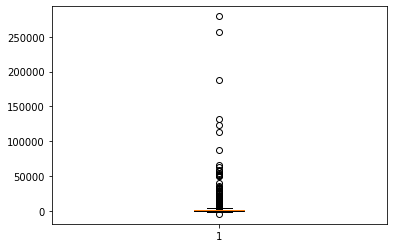

In [24]:
plt.boxplot(grouped_df['amount'])

Here we will not remove outliers as we will group high spendings customers in differnet clusters.

Two types of ouliers:-
- statistical
- domain specific

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6d1634908>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6d16388c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6d162ef48>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6d1638fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6d163dfc8>],
 'means': []}

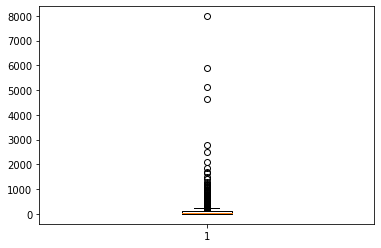

In [25]:
plt.boxplot(grouped_df['frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6d16aab88>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6d16adb48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6d16aa208>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6d16b2c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6d16b2d48>],
 'means': []}

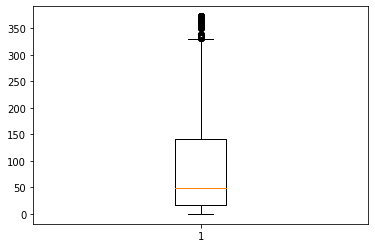

In [26]:
plt.boxplot(grouped_df['recency'])

In [27]:
# we will remove statistical outliers

#outlier treatment for amount
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 -Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 -1.5*IQR)&(grouped_df.amount <= Q3 + 1.5*IQR)]

#outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 -Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 -1.5*IQR)&(grouped_df.recency <= Q3 + 1.5*IQR)]

#outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 -Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 -1.5*IQR)&(grouped_df.frequency <= Q3 + 1.5*IQR)]


**Rescaling**

In [28]:
rfm_df=grouped_df[['amount','frequency','recency']]

In [29]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [30]:
#instantiate
scaler=StandardScaler()

#fit_transform
rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[-0.72373821, -0.75288754,  2.30161144],
       [ 1.73161722,  1.04246665, -0.90646561],
       [ 0.30012791, -0.46363604, -0.18365813],
       ...,
       [-0.67769602, -0.70301659,  0.86589794],
       [-0.6231313 , -0.64317145, -0.84705678],
       [ 0.32293822, -0.07464263, -0.50050524]])

In [31]:
rfm_df_scaled.shape

(4293, 3)

**We Pass a dataframe to the Hopkins statistic function to find if the dataset is suitable for clustering or not**

In [32]:
#convert to dataframe
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns=['amount','frequency','recency']
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


### Step 4:Modelling

In [33]:
from sklearn.cluster import KMeans

In [34]:
#k-means with some arbitaray k
kmeans=KMeans(n_clusters=4,max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
kmeans.labels_

array([2, 0, 1, ..., 2, 1, 1])

In [36]:
len(kmeans.labels_)

4293

**Finding the optimal number of clusters**

### SSD

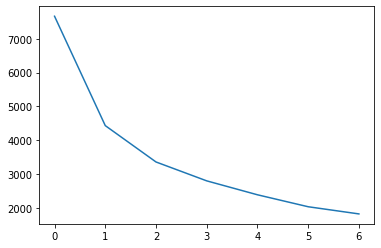

In [37]:
#elbow-curve / SSD
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
#plot the SSD's for each n_clusters
#ssd
plt.plot(ssd)   

As you increase the number of clusters the ssd will obviously.Here after 3 clusters we can see rate of drop in SSD reduces drastically.

### Silhouette analysis

In [38]:
#Silhouette analysis

from sklearn.metrics import silhouette_score

range_n_clusters=[2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    
    #initialise kmeans
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels=kmeans.labels_
    
    #silhouhette score
    silhouette_avg=silhouette_score(rfm_df_scaled,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters,silhouette_avg))

For n_clusters=2, the silhouette score is 0.5411246404292333
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.4816217519322445
For n_clusters=5, the silhouette score is 0.4662700564189704
For n_clusters=6, the silhouette score is 0.41701275166264423
For n_clusters=7, the silhouette score is 0.415794978066716
For n_clusters=8, the silhouette score is 0.4019229799420772


Although for 2 clusters silhouette score is high, the number of clusters depends on the business problem we are trying to solve.

**So we will proceed with K=3 clusters**

In [39]:
#final model with k=3

kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
kmeans.labels_

array([2, 0, 1, ..., 2, 1, 1])

In [41]:
#assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


**Visualise using boxplot after outlier treatment**

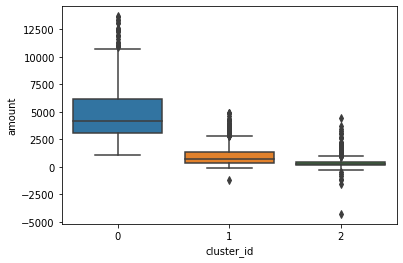

In [42]:
# plot
sns.boxplot(x='cluster_id',y='amount',data=grouped_df)

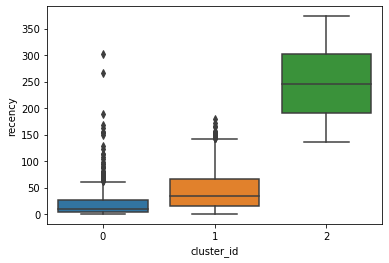

In [43]:
sns.boxplot(x='cluster_id',y='recency',data=grouped_df)

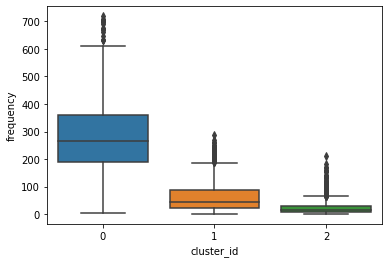

In [44]:
sns.boxplot(x='cluster_id',y='frequency',data=grouped_df)

## Hierarchical Clustering

We already have the RFM datafame which has been treated for missing values and outliers, and is also standardised. we will use the same dataframe **rfm_df_scaled** and apply Hierarchical clsutering to do customer segmentation.

**The hierarchical clustering involves 2 basic steps:**

1. Creating the dendrogram
2. Cutting the dendrogram at an appropriate level

In [45]:
#importing other required libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [46]:
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [47]:
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


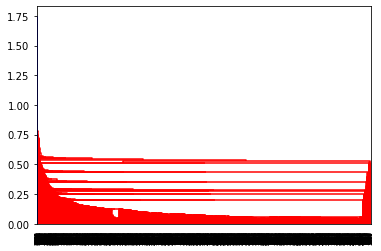

In [48]:
#we will use single linkage to compute intracluster Distance
mergings = linkage(rfm_df_scaled , method="single", metric="euclidean")
dendrogram(mergings)
plt.show()

We can clearly see, single linkage doesn't produce a good enough result for us to analyse the clusters. Hence, we need to go ahead and utilise the complete linkage method and then analyse the clusters once again.

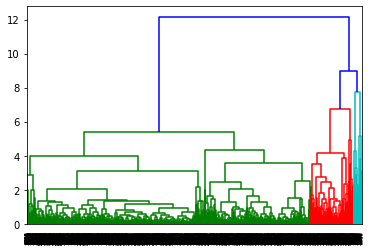

In [49]:
#we will npw use complete linkage to compute intracluster Distance
mergings = linkage(rfm_df_scaled , method="complete", metric="euclidean")
dendrogram(mergings)
plt.show()

Now we will create 3 Clusters

In [50]:
cut_tree(mergings , n_clusters=3)

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [51]:
cut_tree(mergings , n_clusters=3).shape

(4293, 1)

In [52]:
#we will reshape array of (4293, 1) to a numpy series of (4293 , )
cluster_labels = cut_tree(mergings , n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [53]:
#assign cluster labels
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id,cluster_labels
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,0,1
2,12348.0,1797.24,31,74,1,0
3,12349.0,1757.55,73,18,1,0
4,12350.0,334.40,17,309,2,0


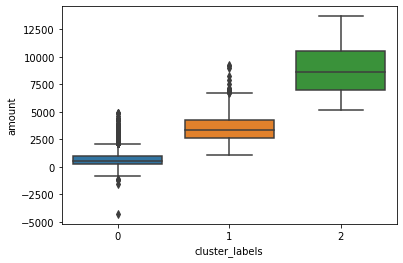

In [54]:
#plots
sns.boxplot(x='cluster_labels' , y ='amount', data=grouped_df)

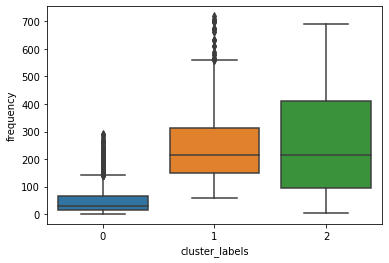

In [55]:
sns.boxplot(x='cluster_labels' , y ='frequency', data=grouped_df)

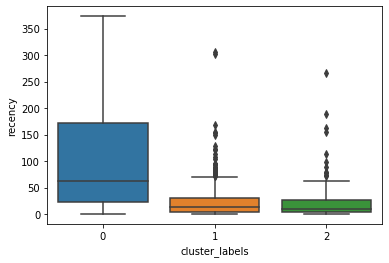

In [56]:
sns.boxplot(x='cluster_labels' , y ='recency', data=grouped_df)

### Conclusion : 
RFM analysis was done to check customer purchasing behaviour and accordingly they where segemented for business driven descisons to improve online sales.